In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
nnn = 512
bsz = 5.0 # degree
dsx = bsz/nnn
bsz_arc = bsz*3600. # in the units of Einstein Radius
dsx_arc = dsx*3600.
pad = 6 

In [4]:
import os

In [5]:
class Magnification(object):
    def __init__(self, 
                 data_dir='./new_test/'):
        self.data_dir = data_dir
    def fname(self, maps):
        """
        """
        if maps == 
        fname = 
        os.path.join(+name_base+"_af1.bin"

SyntaxError: invalid syntax (<ipython-input-5-56cfcc6f028a>, line 8)

In [8]:


def main(name_base):
    pl.figure()
    
    nbins = 100
    nrange = (0.9, 1.1)
    if name_base == "373_0.317080":
        nbins = 100
        nrange = (0.98, 1.05)
    if name_base == "247_0.976569":
        nbins = 100
        nrange = (0.925, 1.2)

    #-------------------------
    # non-ray-traced maps
    #
    
    al1_map = np.fromfile("./new_test/"+name_base+"_af1.bin", dtype="float32").reshape((nnn, nnn))[6:-6, 6:-6]
    al2_map = np.fromfile("./new_test/"+name_base+"_af2.bin", dtype="float32").reshape((nnn, nnn))[6:-6, 6:-6]
    kpa_map = np.fromfile("./new_test/"+name_base+"_kf0.bin", dtype="float32").reshape((nnn, nnn))[6:-6, 6:-6]
    sh1_map = np.fromfile("./new_test/"+name_base+"_sf1.bin", dtype="float32").reshape((nnn, nnn))[6:-6, 6:-6]
    sh2_map = np.fromfile("./new_test/"+name_base+"_sf2.bin", dtype="float32").reshape((nnn, nnn))[6:-6, 6:-6]
    #-----------------------------
    al11, al12 = np.gradient(al1_map, dsx_arc)
    al21, al22 = np.gradient(al2_map, dsx_arc)
    mua_rcl = 1.0/(al11*al22-(al11+al22)-al12*al21+1.0)
    
    n, bins, patches = pl.hist(np.ravel(mua_rcl), nbins, range=nrange, density=True, facecolor='g', alpha=0.2)
    #-------------------------
    # interpolated
    #
    
    xr1 = np.fromfile("./new_test/" + nbase + "_xr1.bin", dtype="float32")
    xr2 = np.fromfile("./new_test/" + nbase + "_xr2.bin", dtype="float32")

    x_ll = -bsz_arc/2.0+0.5*dsx_arc + pad*dsx_arc
    x_ul =  bsz_arc/2.0-0.5*dsx_arc - pad*dsx_arc
    y_ll = -bsz_arc/2.0+0.5*dsx_arc + pad*dsx_arc
    y_ul =  bsz_arc/2.0-0.5*dsx_arc - pad*dsx_arc

    idx1 = xr1 > x_ll
    idx2 = xr1 <=x_ul
    idx3 = xr2 > y_ll
    idx4 = xr2 <=x_ul

    idx = idx1&idx2&idx3&idx4

    mua_frt = np.fromfile("./new_test/" + name_base + "_mra.bin", dtype="float32")
    mua_frt_cln = mua_frt[idx]
    
    n, bins, patches = pl.hist(mua_frt_cln, nbins, range=nrange, density=True, facecolor='r', alpha=0.2)
    
    #-------------------------
    # Fully ray-traced 
    #
    
    xr1_frt = np.fromfile("ray_traced/" + name_base + "_xr1.bin", dtype="float32")
    xr2_frt = np.fromfile("ray_traced/" + name_base + "_xr2.bin", dtype="float32")
    mua_frt = np.fromfile("ray_traced/" + name_base + "_mra.bin", dtype="float32")

    x_ll = -bsz_arc/2.0+0.5*dsx_arc + pad*dsx_arc
    x_ul =  bsz_arc/2.0-0.5*dsx_arc - pad*dsx_arc
    y_ll = -bsz_arc/2.0+0.5*dsx_arc + pad*dsx_arc
    y_ul =  bsz_arc/2.0-0.5*dsx_arc - pad*dsx_arc

    idx1 = xr1_frt > x_ll
    idx2 = xr1_frt <=x_ul
    idx3 = xr2_frt > y_ll
    idx4 = xr2_frt <=x_ul

    idx = idx1&idx2&idx3&idx4

    mua_frt = np.fromfile("./new_test/" + name_base + "_mra.bin", dtype="float32")
    mua_frt_cln = mua_frt[idx]

    n, bins, patches = pl.hist(mua_frt_cln, nbins, range=nrange, density=True, facecolor='b', alpha=0.2)

    return mua_frt_cln

In [11]:
import matplotlib.pyplot as plt

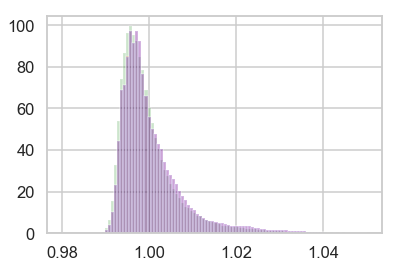

In [12]:
#-----------------
# zs = 0.31, redshift of sources
#
nbase = "373_0.317080"
mu_p3 = main(nbase)
plt.savefig('mu_z_0p3.pdf')

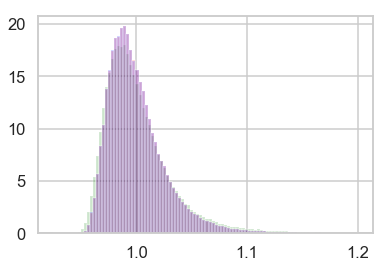

In [13]:
#-----------------
# zs = 0.98, redshift of sources
#

nbase = "247_0.976569"
mu_1 = main(nbase)
plt.savefig('z_1.pdf')

/Users/rbiswas/soft/mypython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rbiswas/soft/mypython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.85, 1.15)

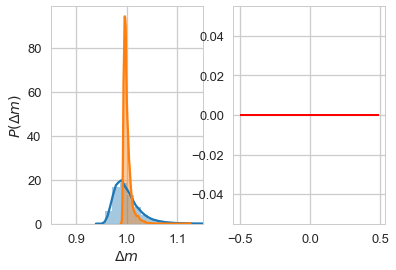

In [25]:
fig, ax = pl.subplots(1, 2)
sns.distplot(mu_1, hist=True, ax=ax[0], label='z=1.0')
sns.distplot(mu_p3, hist=True, ax=ax[0], label='z=0.3')
ax[0].set_ylabel(r'$P(\Delta m)$')
ax[0].set_xlabel(r'$\Delta m$')
ax[1].hist(mu_1, label='z=1.0', histtype='step', alpha=1, cumulative=1,
           bins=np.arange(-0.5, 0.5, 0.05), lw=2, color='k')
ax[1].hist(mu_p3, label='z=0.3', histtype='step', alpha=1, cumulative=1,
           bins=np.arange(-0.5, 0.5, 0.03), lw=2, color='r')

ax[0].set_xlim(1-0.15, 1+0.15)        
#ax[1].set_xlim(-0.15, 0.15)        

/Users/rbiswas/soft/mypython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rbiswas/soft/mypython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-0.15, 0.15)

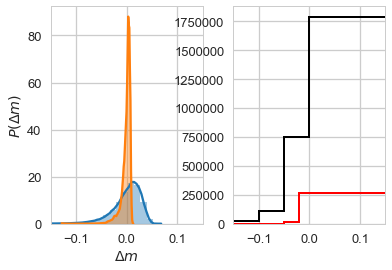

In [21]:
fig, ax = pl.subplots(1, 2)
sns.distplot(-2.5*np.log10(mu_1), hist=True, ax=ax[0], label='z=1.0')
sns.distplot(-2.5 * np.log10(mu_p3), hist=True, ax=ax[0], label='z=0.3')
ax[0].set_ylabel(r'$P(\Delta m)$')
ax[0].set_xlabel(r'$\Delta m$')
ax[1].hist(-2.5*np.log10(mu_1), label='z=1.0', histtype='step', alpha=1, cumulative=1,
           bins=np.arange(-0.5, 0.5, 0.05), lw=2, color='k')
ax[1].hist(-2.5*np.log10(mu_p3), label='z=0.3', histtype='step', alpha=1, cumulative=1,
           bins=np.arange(-0.5, 0.5, 0.03), lw=2, color='r')

ax[0].set_xlim(-0.15, 0.15)        
ax[1].set_xlim(-0.15, 0.15)        

In [147]:
pdf, edges = np.histogram(-2.5*np.log10(mu_1), bins=np.arange(-1.5, 1.5, 0.05), density=True)

In [148]:
len(pdf), len(edges)

(59, 60)

In [155]:
cdf = np.array(list(pdf[:i].sum() for i in range(pdf.size)))* (edges[1]-edges[0])

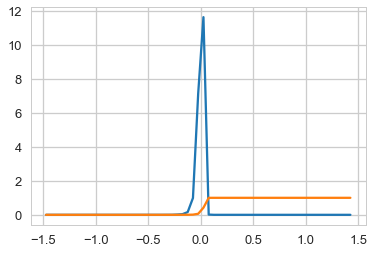

In [154]:
pl.plot((edges[:-1] + edges[1:])/2., pdf)
pl.plot((edges[:-1] + edges[1:])/2., cdf)

In [34]:
mu_1.size

1789979

In [48]:
sample_p3_10 = np.random.choice(mu_p3, size=10, replace=True).
sample_p3_100 = np.random.choice(mu_p3, size=100, replace=True)
sample_p3_1000 = np.random.choice(mu_p3, size=1000, replace=True)
sample_p3_10000 = np.random.choice(mu_p3, size=10000, replace=True)
sample_p3_100000 = np.random.choice(mu_p3, size=100000, replace=True)

In [58]:
#sample_1_10 = np.random.choice(mu_1, size=10, replace=True)
#sample_1_100 = np.random.choice(mu_1, size=100, replace=True)
#sample_1_1000 = np.random.choice(mu_1, size=1000, replace=True)
#sample_1_10000 = np.random.choice(mu_1, size=10000, replace=True)
sample_1_100000 = np.random.choice(mu_1, size=100000, replace=False)

In [72]:
sample_1_100000.reshape((1000, 100)).mean(axis=0).size

100

In [76]:
def samples(sample, total, N):
    sample = np.random.choice(sample, size=total)
    numrows = np.int(total / N)
    return sample.reshape((numrows, N)).mean(axis=0)

In [110]:
vals = np.hstack(list(np.array((10, 20,  50, 100))*y for y in (1, 10, 100, 1000)))

In [111]:
vals

array([    10,     20,     50,    100,    100,    200,    500,   1000,
         1000,   2000,   5000,  10000,  10000,  20000,  50000, 100000])

In [127]:
samples(mu_1, 100000, 1000).size

1000

In [134]:
mu_std_1  = np.array(list(samples(mu_1, 100000, x).std() for x in vals))

In [135]:
mu_std_1

array([ 0.00039547,  0.00043305,  0.00056515,  0.00090407,  0.00087575,
        0.00134426,  0.00198496,  0.00281952,  0.00295976,  0.00406931,
        0.00621955,  0.00923903,  0.00899495,  0.01293534,  0.02029727,
        0.02820293], dtype=float32)

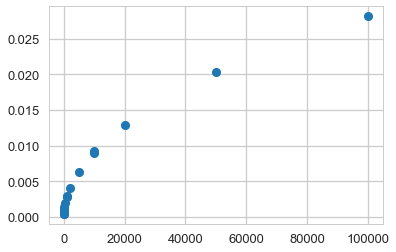

In [136]:
pl.plot(vals, mu_, 'o')

In [54]:
sigma_p3 = np.array(list(np.std(x) for x in (sample_p3_10, sample_p3_100, sample_p3_1000, sample_p3_10000,
                                  sample_p3_100000)))

In [55]:
sigma_1p0 = np.array(list(np.std(x) for x in (sample_1_10, sample_1_100, sample_1_1000, sample_1_10000,
                                  sample_1_100000)))

In [57]:
sigma_p3 / sigma_1p0

array([ 0.91117537,  0.36870229,  0.29663244,  0.30424058,  0.29905382], dtype=float32)

In [47]:
np.array(list(np.mean(x) for x in (sample_1_10, sample_1_100, sample_1_1000, sample_1_10000,
                                  sample_1_100000)))

array([ 0.99369699,  1.00255358,  1.00098848,  1.00028455,  1.00094938], dtype=float32)

In [ ]:
np.array(list(np.std(x) for x in (sample_1_10, sample_1_100, sample_1_1000, sample_1_10000, sample_1_100000)))

In [13]:
-2.5 * np.log10(1.01)

-0.010803434456606446

In [ ]:
ax[0].set_xlim(-0.15, 0.15)        

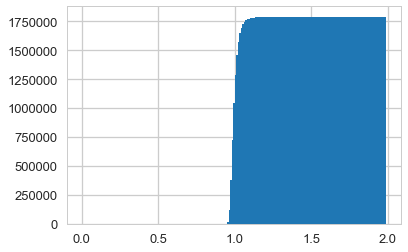

In [140]:
num, edges, patches = pl.hist(mu_1, cumulative=1, bins=np.arange(0., 2., 0.01))


In [141]:
num

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,